In [1]:
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
import function
import matplotlib.pyplot as plt
import math

# データ生成

In [2]:
X_1,X_2,y=function.gene_data(p_1=50,p_2=50,n=100,r_J=10,r_1=5,r_2=5,r_prop=0.8,w_J=2.0,w_1=1.0,w_2=1.0,X1_erro=0.2,X2_erro=0.2,y_erro=0.2)

# sJIVE

In [ ]:
erro_lis,S_J,U_1,U_2,theta_1,S_1,W_1,theta_21,S_2,W_2,theta_22=function.sJIVE(eta=0.5,r_J=10,r_1=5,r_2=5,X_1=X_1,X_2=X_2,y=y)

In [ ]:
plt.plot(erro_lis)
plt.scatter(range(len(erro_lis)),erro_lis,color="black")
plt.show

# sJIVEを実装

In [3]:
eta=0.5
r_J=10
r_1=10
r_2=10

## ノーマル

In [12]:

erro_lis=[]
erro=100.0
p_1=X_1.shape[0]
p_2=X_2.shape[0]
n=X_1.shape[1]
X_1=math.sqrt(eta)*X_1
X_2=math.sqrt(eta)*X_2
y=math.sqrt(1-eta)*y
#初期値を入れる
U_1=math.sqrt(eta)*np.random.uniform(low=-0.1, high=0.1, size=(p_1,r_J))
U_2=math.sqrt(eta)*np.random.uniform(low=-0.1, high=0.1, size=(p_2,r_J))
W_1=math.sqrt(eta)*np.random.uniform(low=-0.1, high=0.1, size=(p_1,r_1))
W_2=math.sqrt(eta)*np.random.uniform(low=-0.1, high=0.1, size=(p_2,r_2))
theta_1=math.sqrt(1-eta)*np.random.uniform(low=-0.1, high=0.1, size=int(r_J))
theta_21=math.sqrt(1-eta)*np.random.uniform(low=-0.1, high=0.1, size=int(r_1))
theta_22=math.sqrt(1-eta)*np.random.uniform(low=-0.1, high=0.1, size=int(r_2))
S_J=np.random.uniform(low=-0.1, high=0.1, size=(r_J,n))
S_1=np.random.uniform(low=-0.1, high=0.1, size=(r_1,n))
S_2=np.random.uniform(low=-0.1, high=0.1, size=(r_2,n))
for i in range(50):
    #以下を誤差が収束するまで繰り返し
    #S_Jを更新
    U_theta_1=np.row_stack((U_1,U_2,theta_1)) #1
    X_y=np.row_stack((X_1,X_2,y)) #2
    W_1_S_1=W_1.dot(S_1)
    W_2_S_2=W_2.dot(S_2)
    W_S=np.row_stack((W_1_S_1,W_2_S_2))
    theta_2i_S_i=theta_21.dot(S_1)+theta_22.dot(S_2)
    W_theta_2i_S_i=np.row_stack((W_S,theta_2i_S_i)) #3
    S_J=U_theta_1.T.dot(X_y-W_theta_2i_S_i) #1,2,3からS_Jを更新
    #U_1,U_2,theta_1を更新
    X_y_joint=X_y-W_theta_2i_S_i
    U_J,sigma_J,VT_J=np.linalg.svd(X_y_joint,full_matrices=False) #特異値分解を行う
    U_1=U_J[:p_1,:r_J]
    U_2=U_J[p_1:p_1+p_2,:r_J]
    theta_1=U_J[p_1+p_2:,:r_J]
    #S_1を更新
    W_1_theta_21=np.row_stack((W_1,theta_21)) #1
    y_theta_22S_2=y-theta_22.dot(S_2)
    X_1_y_theta_22S_2=np.row_stack((X_1,y_theta_22S_2)) #2
    U_1_S_J=U_1.dot(S_J)
    theta_1_S_J=theta_1.dot(S_J)
    U_1_S_J_theta_1_S_J=np.row_stack((U_1_S_J,theta_1_S_J)) #3
    P_SJ=S_J.T.dot(np.linalg.inv(S_J.dot(S_J.T))).dot(S_J)
    diag_matrix = np.diag([1] * n)
    P_SJ_C=diag_matrix-P_SJ #Jointの直交補空間を作成 #4
    S_1=W_1_theta_21.T.dot((X_1_y_theta_22S_2-U_1_S_J_theta_1_S_J)).dot(P_SJ_C) #1,2,3,4からS_1を更新
    #W_1,theta_21を更新
    U_I_1,sigma_1,VT_1=np.linalg.svd((X_1_y_theta_22S_2-U_1_S_J_theta_1_S_J).dot(P_SJ_C),full_matrices=False) #特異値分解を行う
    W_1=U_I_1[:p_1,:r_1]
    theta_21=U_I_1[p_1:,:r_1]
    #S_2を更新
    W_2_theta_22=np.row_stack((W_2,theta_22)) #1
    y_theta_21S_1=y-theta_21.dot(S_1)
    X_2_y_theta_21S_1=np.row_stack((X_2,y_theta_21S_1)) #2
    U_2_S_J=U_2.dot(S_J)
    theta_1_S_J=theta_1.dot(S_J)
    U_2_S_J_theta_1_S_J=np.row_stack((U_2_S_J,theta_1_S_J)) #3
    S_2=W_2_theta_22.T.dot(X_2_y_theta_21S_1-U_2_S_J_theta_1_S_J).dot(P_SJ_C) #1,2,3からS_2を更新
    #W_2,theta_22を更新
    U_I_2,sigma_2,VT_2=np.linalg.svd((X_2_y_theta_21S_1-U_2_S_J_theta_1_S_J).dot(P_SJ_C),full_matrices=False) #特異値分解を行う
    W_2=U_I_2[:p_2,:r_2]
    theta_22=U_I_2[p_2:,:r_2]
    #推定値を計算
    U_theta_1=np.row_stack((U_1,U_2,theta_1)) #1
    W_1_S_1=W_1.dot(S_1)
    W_2_S_2=W_2.dot(S_2)
    W_S=np.row_stack((W_1_S_1,W_2_S_2)) #2
    theta_2i_S_i=theta_21.dot(S_1)+theta_22.dot(S_2)
    W_theta_2i_S_i=np.row_stack((W_S,theta_2i_S_i)) #3
    hat_X_y=U_theta_1.dot(S_J)+W_theta_2i_S_i #1,2,3から推定値を算出
    #誤差を計算
    X_y=np.row_stack((X_1,X_2,y))
    erro=np.linalg.norm(X_y-hat_X_y,ord=2)**2
    erro_lis.append(erro)

## 毎回誤差をとる

In [29]:
erro_lis=[]
erro=100.0
p_1=X_1.shape[0]
p_2=X_2.shape[0]
n=X_1.shape[1]
X_1=math.sqrt(eta)*X_1
X_2=math.sqrt(eta)*X_2
y=math.sqrt(1-eta)*y
#初期値を入れる
U_1=math.sqrt(eta)*np.random.uniform(low=-0.1, high=0.1, size=(p_1,r_J))
U_2=math.sqrt(eta)*np.random.uniform(low=-0.1, high=0.1, size=(p_2,r_J))
W_1=math.sqrt(eta)*np.random.uniform(low=-0.1, high=0.1, size=(p_1,r_1))
W_2=math.sqrt(eta)*np.random.uniform(low=-0.1, high=0.1, size=(p_2,r_2))
theta_1=math.sqrt(1-eta)*np.random.uniform(low=-0.1, high=0.1, size=int(r_J))
theta_21=math.sqrt(1-eta)*np.random.uniform(low=-0.1, high=0.1, size=int(r_1))
theta_22=math.sqrt(1-eta)*np.random.uniform(low=-0.1, high=0.1, size=int(r_2))
S_J=np.random.uniform(low=-0.1, high=0.1, size=(r_J,n))
S_1=np.random.uniform(low=-0.1, high=0.1, size=(r_1,n))
S_2=np.random.uniform(low=-0.1, high=0.1, size=(r_2,n))
for i in range(10):
    #以下を誤差が収束するまで繰り返し
    #S_Jを更新
    U_theta_1=np.row_stack((U_1,U_2,theta_1)) #1
    X_y=np.row_stack((X_1,X_2,y)) #2
    W_1_S_1=W_1.dot(S_1)
    W_2_S_2=W_2.dot(S_2)
    W_S=np.row_stack((W_1_S_1,W_2_S_2))
    theta_2i_S_i=theta_21.dot(S_1)+theta_22.dot(S_2)
    W_theta_2i_S_i=np.row_stack((W_S,theta_2i_S_i)) #3
    S_J=U_theta_1.T.dot(X_y-W_theta_2i_S_i) #1,2,3からS_Jを更新
    #推定値を計算
    U_theta_1=np.row_stack((U_1,U_2,theta_1)) #1
    W_1_S_1=W_1.dot(S_1)
    W_2_S_2=W_2.dot(S_2)
    W_S=np.row_stack((W_1_S_1,W_2_S_2)) #2
    theta_2i_S_i=theta_21.dot(S_1)+theta_22.dot(S_2)
    W_theta_2i_S_i=np.row_stack((W_S,theta_2i_S_i)) #3
    hat_X_y=U_theta_1.dot(S_J)+W_theta_2i_S_i #1,2,3から推定値を算出
    #誤差を計算
    X_y=np.row_stack((X_1,X_2,y))
    erro=np.linalg.norm(X_y-hat_X_y,ord=2)**2
    erro_lis.append(erro)
    #U_1,U_2,theta_1を更新
    X_y_joint=X_y-W_theta_2i_S_i
    U_J,sigma_J,VT_J=np.linalg.svd(X_y_joint,full_matrices=False) #特異値分解を行う
    U_1=U_J[:p_1,:r_J]
    U_2=U_J[p_1:p_1+p_2,:r_J]
    theta_1=U_J[p_1+p_2:,:r_J]
    #推定値を計算
    U_theta_1=np.row_stack((U_1,U_2,theta_1)) #1
    W_1_S_1=W_1.dot(S_1)
    W_2_S_2=W_2.dot(S_2)
    W_S=np.row_stack((W_1_S_1,W_2_S_2)) #2
    theta_2i_S_i=theta_21.dot(S_1)+theta_22.dot(S_2)
    W_theta_2i_S_i=np.row_stack((W_S,theta_2i_S_i)) #3
    hat_X_y=U_theta_1.dot(S_J)+W_theta_2i_S_i #1,2,3から推定値を算出
    #誤差を計算
    X_y=np.row_stack((X_1,X_2,y))
    erro=np.linalg.norm(X_y-hat_X_y,ord=2)**2
    erro_lis.append(erro)
    #S_1を更新
    W_1_theta_21=np.row_stack((W_1,theta_21)) #1
    y_theta_22S_2=y-theta_22.dot(S_2)
    X_1_y_theta_22S_2=np.row_stack((X_1,y_theta_22S_2)) #2
    U_1_S_J=U_1.dot(S_J)
    theta_1_S_J=theta_1.dot(S_J)
    U_1_S_J_theta_1_S_J=np.row_stack((U_1_S_J,theta_1_S_J)) #3
    P_SJ=S_J.T.dot(np.linalg.inv(S_J.dot(S_J.T))).dot(S_J)
    diag_matrix = np.diag([1] * n)
    P_SJ_C=diag_matrix-P_SJ #Jointの直交補空間を作成 #4
    S_1=W_1_theta_21.T.dot((X_1_y_theta_22S_2-U_1_S_J_theta_1_S_J)).dot(P_SJ_C) #1,2,3,4からS_1を更新
    #推定値を計算
    U_theta_1=np.row_stack((U_1,U_2,theta_1)) #1
    W_1_S_1=W_1.dot(S_1)
    W_2_S_2=W_2.dot(S_2)
    W_S=np.row_stack((W_1_S_1,W_2_S_2)) #2
    theta_2i_S_i=theta_21.dot(S_1)+theta_22.dot(S_2)
    W_theta_2i_S_i=np.row_stack((W_S,theta_2i_S_i)) #3
    hat_X_y=U_theta_1.dot(S_J)+W_theta_2i_S_i #1,2,3から推定値を算出
    #誤差を計算
    X_y=np.row_stack((X_1,X_2,y))
    erro=np.linalg.norm(X_y-hat_X_y,ord=2)**2
    erro_lis.append(erro)
    #W_1,theta_21を更新
    U_I_1,sigma_1,VT_1=np.linalg.svd((X_1_y_theta_22S_2-U_1_S_J_theta_1_S_J).dot(P_SJ_C),full_matrices=False) #特異値分解を行う
    W_1=U_I_1[:p_1,:r_1]
    theta_21=U_I_1[p_1:,:r_1]
    #推定値を計算
    U_theta_1=np.row_stack((U_1,U_2,theta_1)) #1
    W_1_S_1=W_1.dot(S_1)
    W_2_S_2=W_2.dot(S_2)
    W_S=np.row_stack((W_1_S_1,W_2_S_2)) #2
    theta_2i_S_i=theta_21.dot(S_1)+theta_22.dot(S_2)
    W_theta_2i_S_i=np.row_stack((W_S,theta_2i_S_i)) #3
    hat_X_y=U_theta_1.dot(S_J)+W_theta_2i_S_i #1,2,3から推定値を算出
    #誤差を計算
    X_y=np.row_stack((X_1,X_2,y))
    erro=np.linalg.norm(X_y-hat_X_y,ord=2)**2
    erro_lis.append(erro)
    #S_2を更新
    W_2_theta_22=np.row_stack((W_2,theta_22)) #1
    y_theta_21S_1=y-theta_21.dot(S_1)
    X_2_y_theta_21S_1=np.row_stack((X_2,y_theta_21S_1)) #2
    U_2_S_J=U_2.dot(S_J)
    theta_1_S_J=theta_1.dot(S_J)
    U_2_S_J_theta_1_S_J=np.row_stack((U_2_S_J,theta_1_S_J)) #3
    S_2=W_2_theta_22.T.dot(X_2_y_theta_21S_1-U_2_S_J_theta_1_S_J).dot(P_SJ_C) #1,2,3からS_2を更新
    #推定値を計算
    U_theta_1=np.row_stack((U_1,U_2,theta_1)) #1
    W_1_S_1=W_1.dot(S_1)
    W_2_S_2=W_2.dot(S_2)
    W_S=np.row_stack((W_1_S_1,W_2_S_2)) #2
    theta_2i_S_i=theta_21.dot(S_1)+theta_22.dot(S_2)
    W_theta_2i_S_i=np.row_stack((W_S,theta_2i_S_i)) #3
    hat_X_y=U_theta_1.dot(S_J)+W_theta_2i_S_i #1,2,3から推定値を算出
    #誤差を計算
    X_y=np.row_stack((X_1,X_2,y))
    erro=np.linalg.norm(X_y-hat_X_y,ord=2)**2
    erro_lis.append(erro)
    #W_2,theta_22を更新
    U_I_2,sigma_2,VT_2=np.linalg.svd((X_2_y_theta_21S_1-U_2_S_J_theta_1_S_J).dot(P_SJ_C),full_matrices=False) #特異値分解を行う
    W_2=U_I_2[:p_2,:r_2]
    theta_22=U_I_2[p_2:,:r_2]
    #推定値を計算
    U_theta_1=np.row_stack((U_1,U_2,theta_1)) #1
    W_1_S_1=W_1.dot(S_1)
    W_2_S_2=W_2.dot(S_2)
    W_S=np.row_stack((W_1_S_1,W_2_S_2)) #2
    theta_2i_S_i=theta_21.dot(S_1)+theta_22.dot(S_2)
    W_theta_2i_S_i=np.row_stack((W_S,theta_2i_S_i)) #3
    hat_X_y=U_theta_1.dot(S_J)+W_theta_2i_S_i #1,2,3から推定値を算出
    #誤差を計算
    X_y=np.row_stack((X_1,X_2,y))
    erro=np.linalg.norm(X_y-hat_X_y,ord=2)**2
    erro_lis.append(erro)

## S_Jの後に誤差をとる

In [26]:
erro_lis=[]
erro=100.0
p_1=X_1.shape[0]
p_2=X_2.shape[0]
n=X_1.shape[1]
X_1=math.sqrt(eta)*X_1
X_2=math.sqrt(eta)*X_2
y=math.sqrt(1-eta)*y
#初期値を入れる
U_1=math.sqrt(eta)*np.random.uniform(low=-0.1, high=0.1, size=(p_1,r_J))
U_2=math.sqrt(eta)*np.random.uniform(low=-0.1, high=0.1, size=(p_2,r_J))
W_1=math.sqrt(eta)*np.random.uniform(low=-0.1, high=0.1, size=(p_1,r_1))
W_2=math.sqrt(eta)*np.random.uniform(low=-0.1, high=0.1, size=(p_2,r_2))
theta_1=math.sqrt(1-eta)*np.random.uniform(low=-0.1, high=0.1, size=int(r_J))
theta_21=math.sqrt(1-eta)*np.random.uniform(low=-0.1, high=0.1, size=int(r_1))
theta_22=math.sqrt(1-eta)*np.random.uniform(low=-0.1, high=0.1, size=int(r_2))
S_J=np.random.uniform(low=-0.1, high=0.1, size=(r_J,n))
S_1=np.random.uniform(low=-0.1, high=0.1, size=(r_1,n))
S_2=np.random.uniform(low=-0.1, high=0.1, size=(r_2,n))
for i in range(100):
    #以下を誤差が収束するまで繰り返し
    #S_Jを更新
    U_theta_1=np.row_stack((U_1,U_2,theta_1)) #1
    X_y=np.row_stack((X_1,X_2,y)) #2
    W_1_S_1=W_1.dot(S_1)
    W_2_S_2=W_2.dot(S_2)
    W_S=np.row_stack((W_1_S_1,W_2_S_2))
    theta_2i_S_i=theta_21.dot(S_1)+theta_22.dot(S_2)
    W_theta_2i_S_i=np.row_stack((W_S,theta_2i_S_i)) #3
    S_J=U_theta_1.T.dot(X_y-W_theta_2i_S_i) #1,2,3からS_Jを更新
    #推定値を計算
    U_theta_1=np.row_stack((U_1,U_2,theta_1)) #1
    W_1_S_1=W_1.dot(S_1)
    W_2_S_2=W_2.dot(S_2)
    W_S=np.row_stack((W_1_S_1,W_2_S_2)) #2
    theta_2i_S_i=theta_21.dot(S_1)+theta_22.dot(S_2)
    W_theta_2i_S_i=np.row_stack((W_S,theta_2i_S_i)) #3
    hat_X_y=U_theta_1.dot(S_J)+W_theta_2i_S_i #1,2,3から推定値を算出
    #誤差を計算
    X_y=np.row_stack((X_1,X_2,y))
    erro=np.linalg.norm(X_y-hat_X_y,ord=2)**2
    erro_lis.append(erro)
    #U_1,U_2,theta_1を更新
    X_y_joint=X_y-W_theta_2i_S_i
    U_J,sigma_J,VT_J=np.linalg.svd(X_y_joint,full_matrices=False) #特異値分解を行う
    U_1=U_J[:p_1,:r_J]
    U_2=U_J[p_1:p_1+p_2,:r_J]
    theta_1=U_J[p_1+p_2:,:r_J]
    #S_1を更新
    W_1_theta_21=np.row_stack((W_1,theta_21)) #1
    y_theta_22S_2=y-theta_22.dot(S_2)
    X_1_y_theta_22S_2=np.row_stack((X_1,y_theta_22S_2)) #2
    U_1_S_J=U_1.dot(S_J)
    theta_1_S_J=theta_1.dot(S_J)
    U_1_S_J_theta_1_S_J=np.row_stack((U_1_S_J,theta_1_S_J)) #3
    P_SJ=S_J.T.dot(np.linalg.inv(S_J.dot(S_J.T))).dot(S_J)
    diag_matrix = np.diag([1] * n)
    P_SJ_C=diag_matrix-P_SJ #Jointの直交補空間を作成 #4
    S_1=W_1_theta_21.T.dot((X_1_y_theta_22S_2-U_1_S_J_theta_1_S_J)).dot(P_SJ_C) #1,2,3,4からS_1を更新
    #W_1,theta_21を更新
    U_I_1,sigma_1,VT_1=np.linalg.svd((X_1_y_theta_22S_2-U_1_S_J_theta_1_S_J).dot(P_SJ_C),full_matrices=False) #特異値分解を行う
    W_1=U_I_1[:p_1,:r_1]
    theta_21=U_I_1[p_1:,:r_1]
    #S_2を更新
    W_2_theta_22=np.row_stack((W_2,theta_22)) #1
    y_theta_21S_1=y-theta_21.dot(S_1)
    X_2_y_theta_21S_1=np.row_stack((X_2,y_theta_21S_1)) #2
    U_2_S_J=U_2.dot(S_J)
    theta_1_S_J=theta_1.dot(S_J)
    U_2_S_J_theta_1_S_J=np.row_stack((U_2_S_J,theta_1_S_J)) #3
    S_2=W_2_theta_22.T.dot(X_2_y_theta_21S_1-U_2_S_J_theta_1_S_J).dot(P_SJ_C) #1,2,3からS_2を更新
    #W_2,theta_22を更新
    U_I_2,sigma_2,VT_2=np.linalg.svd((X_2_y_theta_21S_1-U_2_S_J_theta_1_S_J).dot(P_SJ_C),full_matrices=False) #特異値分解を行う
    W_2=U_I_2[:p_2,:r_2]
    theta_22=U_I_2[p_2:,:r_2]

## 最後に更新式を加えてみた

In [4]:
i=0
erro_lis=[]
erro=100.0
p_1=X_1.shape[0]
p_2=X_2.shape[0]
n=X_1.shape[1]
X_1=math.sqrt(eta)*X_1
X_2=math.sqrt(eta)*X_2
y=math.sqrt(1-eta)*y
#初期値を入れる
U_1=math.sqrt(eta)*np.random.uniform(low=-0.1, high=0.1, size=(p_1,r_J))
U_2=math.sqrt(eta)*np.random.uniform(low=-0.1, high=0.1, size=(p_2,r_J))
W_1=math.sqrt(eta)*np.random.uniform(low=-0.1, high=0.1, size=(p_1,r_1))
W_2=math.sqrt(eta)*np.random.uniform(low=-0.1, high=0.1, size=(p_2,r_2))
theta_1=math.sqrt(1-eta)*np.random.uniform(low=-0.1, high=0.1, size=int(r_J))
theta_21=math.sqrt(1-eta)*np.random.uniform(low=-0.1, high=0.1, size=int(r_1))
theta_22=math.sqrt(1-eta)*np.random.uniform(low=-0.1, high=0.1, size=int(r_2))
S_J=np.random.uniform(low=-0.1, high=0.1, size=(r_J,n))
S_1=np.random.uniform(low=-0.1, high=0.1, size=(r_1,n))
S_2=np.random.uniform(low=-0.1, high=0.1, size=(r_2,n))
for i in range(100):
    #以下を誤差が収束するまで繰り返し
    #S_Jを更新
    U_theta_1=np.row_stack((U_1,U_2,theta_1)) #1
    X_y=np.row_stack((X_1,X_2,y)) #2
    W_1_S_1=W_1.dot(S_1)
    W_2_S_2=W_2.dot(S_2)
    W_S=np.row_stack((W_1_S_1,W_2_S_2))
    theta_2i_S_i=theta_21.dot(S_1)+theta_22.dot(S_2)
    W_theta_2i_S_i=np.row_stack((W_S,theta_2i_S_i)) #3
    S_J_new=U_theta_1.T.dot(X_y-W_theta_2i_S_i) #1,2,3からS_Jを更新
    #U_1,U_2,theta_1を更新
    X_y_joint=X_y-W_theta_2i_S_i
    U_J,sigma_J,VT_J=np.linalg.svd(X_y_joint,full_matrices=False) #特異値分解を行う
    U_1_new=U_J[:p_1,:r_J]
    U_2_new=U_J[p_1:p_1+p_2,:r_J]
    theta_1_new=U_J[p_1+p_2:,:r_J]
    #S_1を更新
    W_1_theta_21=np.row_stack((W_1,theta_21)) #1
    y_theta_22S_2=y-theta_22.dot(S_2)
    X_1_y_theta_22S_2=np.row_stack((X_1,y_theta_22S_2)) #2
    U_1_S_J=U_1_new.dot(S_J_new)
    theta_1_S_J=theta_1_new.dot(S_J_new)
    U_1_S_J_theta_1_S_J=np.row_stack((U_1_S_J,theta_1_S_J)) #3
    P_SJ=S_J_new.T.dot(np.linalg.inv(S_J_new.dot(S_J_new.T))).dot(S_J_new)
    diag_matrix = np.diag([1] * n)
    P_SJ_C=diag_matrix-P_SJ #Jointの直交補空間を作成 #4
    S_1_new=W_1_theta_21.T.dot((X_1_y_theta_22S_2-U_1_S_J_theta_1_S_J)).dot(P_SJ_C) #1,2,3,4からS_1を更新
    #W_1,theta_21を更新
    U_I_1,sigma_1,VT_1=np.linalg.svd((X_1_y_theta_22S_2-U_1_S_J_theta_1_S_J).dot(P_SJ_C),full_matrices=False) #特異値分解を行う
    W_1_new=U_I_1[:p_1,:r_1]
    theta_21_new=U_I_1[p_1:,:r_1]
    #S_2を更新
    W_2_theta_22=np.row_stack((W_2,theta_22)) #1
    y_theta_21S_1=y-theta_21_new.dot(S_1_new)
    X_2_y_theta_21S_1=np.row_stack((X_2,y_theta_21S_1)) #2
    U_2_S_J=U_2_new.dot(S_J_new)
    theta_1_S_J=theta_1_new.dot(S_J_new)
    U_2_S_J_theta_1_S_J=np.row_stack((U_2_S_J,theta_1_S_J)) #3
    S_2_new=W_2_theta_22.T.dot(X_2_y_theta_21S_1-U_2_S_J_theta_1_S_J).dot(P_SJ_C) #1,2,3からS_2を更新
    #W_2,theta_22を更新
    U_I_2,sigma_2,VT_2=np.linalg.svd((X_2_y_theta_21S_1-U_2_S_J_theta_1_S_J).dot(P_SJ_C),full_matrices=False) #特異値分解を行う
    W_2_new=U_I_2[:p_2,:r_2]
    theta_22_new=U_I_2[p_2:,:r_2]
     #推定値を計算
    U_theta_1=np.row_stack((U_1_new,U_2_new,theta_1_new)) #1
    W_1_S_1=W_1_new.dot(S_1_new)
    W_2_S_2=W_2_new.dot(S_2_new)
    W_S=np.row_stack((W_1_S_1,W_2_S_2)) #2
    theta_2i_S_i=theta_21_new.dot(S_1_new)+theta_22_new.dot(S_2_new)
    W_theta_2i_S_i=np.row_stack((W_S,theta_2i_S_i)) #3
    hat_X_y=U_theta_1.dot(S_J_new)+W_theta_2i_S_i #1,2,3から推定値を算出
    #誤差を計算
    X_y=np.row_stack((X_1,X_2,y))
    erro=np.linalg.norm(X_y-hat_X_y,ord=2)**2
    erro_lis.append(erro)
    #更新
    S_J=S_J_new
    U_1=U_1_new
    U_2=U_2_new
    theta_1=theta_1_new
    S_1=S_1_new
    W_1=W_1_new
    theta_21=theta_21_new
    S_2=S_2_new
    W_2=W_2_new
    theta_22=theta_22_new




In [5]:
erro_lis

[2894.3282132867444,
 695.7982930890088,
 762.0993941053912,
 11952.102162676798,
 11952.92827753823,
 546.6603964705229,
 11953.641045298933,
 11954.306863872158,
 361.04715256285596,
 566.488023606522,
 745.818334036038,
 740.9353032121836,
 711.9668325189627,
 673.2483018140475,
 652.4128161110855,
 11955.15849544095,
 537.8988103793506,
 636.143379038932,
 440.3022144824831,
 431.92374266381745,
 553.4733926946245,
 11953.819355194051,
 641.317207223091,
 11953.786222397663,
 11953.348968566723,
 660.9946968824809,
 11953.19345499204,
 11953.2271613952,
 11952.309644491139,
 749.3492172336937,
 741.7358165329645,
 11952.52104816948,
 763.9665611087278,
 658.3160634980718,
 11953.436629898992,
 11952.961998342274,
 650.7486500554036,
 625.604639941704,
 696.9492607985574,
 553.4556107687463,
 11953.614424097103,
 11953.75117204356,
 11952.483325315712,
 11952.981086104943,
 11953.864038556756,
 666.3819810544795,
 11953.890288549375,
 669.9005191885703,
 11953.65190236989,
 11953.67

<function matplotlib.pyplot.show(close=None, block=None)>

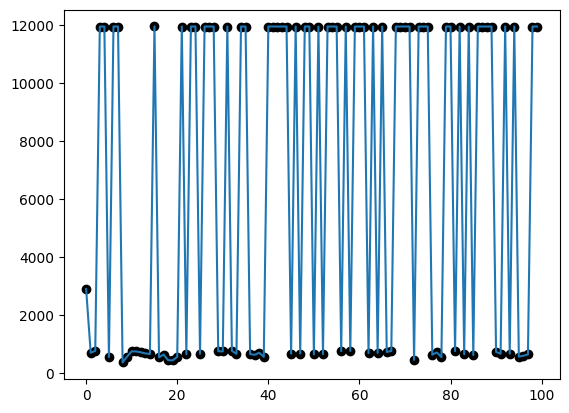

In [6]:
plt.plot(erro_lis)
plt.scatter(range(len(erro_lis)),erro_lis,color="black")
plt.show

In [6]:
for i in range(100):
    i+=1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
